<a href="https://colab.research.google.com/github/Rogerio-mack/CDA_2021_2S/blob/main/CDA_AssociationRules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Regras de Associação
---

**Regras de Associação** ou ainda **Market Basket Analysis** são é uma técnica que permite identificar relações subjacentes entre diferentes itens. Em Supermercado, por exemplo,  clientes podem comprar uma variedade de itens e normalmente podemos encontrar um padrão no que os clientes compram. Mães compram produtos para bebês, como leite e fraldas e mulheres podem comprar itens de maquiagem e produtos para limpeza de pele, e outros compram cervejas e carne para churraco. Assim as transações envolvem um padrão.
As **Regras de Associação** permitem identificar esse padrão o que é um **aprendizado não supervisionado** sobre os dados.

Isso tem um um impacto bastante positivo para os consumidores mas também é de interesse para indústria que podem **aumentar a sua margem ofertando mais produtos** com maior mais probabilidade de conversão de vendas e também para o **planejamento da produção** de itens que são normalmente consumidos juntos.  

> Você pode querer acessar também [Capítulo 5 - Análise de Associações](https://www-users.cse.umn.edu/~kumar001/dmbook/ch5_association_analysis.pdf) 

![imagem](https://www-users.cse.umn.edu/~kumar001/dmbook/dmbook_2ed_small.jpg)




# Usos de Regras de Associação

Você pode imaginar que regras de associação só tenham uso para fazer a recomendação de produtos que tenham maior potencial de serem adquiridos juntos. De fato Regras de Associação parecem ser o **primeiro modelo de Sistemas de Recomendação** depois do modelo ingênuo de **Recomendação por Popularidade** (simplesmente recomendar itens mais vendidos). Mas elas podem ir muito mais além do que isso. Identificados itens associados diversas estratégias podem ser empregadas para maximizar lucros e planejar a produção:

> * Os itens podem ser colocados juntos na loja para aumentar a chance de que o cliente adquira o outro produto.

> * Campanhas de marketing ou vendas para  pessoas que compram um dos produtos podem ser direcionadas para que o cliente compre o outro produto com maior chance de realização da venda

> * Criação de 'pacotes' dos produtos com descontos oferencendo um 'novo produto' que faz sentido para os clientes

> * Previsão da demanda associada dos produtos 

> * Otimizações da produção e estoque dos produtos. Os produtos, por exemplo, podem ser embalados ou transportados juntos, ou estocados próximos para mais fácil acesso




# Conceitos

A construção e análise de regras de associação envolve basicamente:

> * Análise de cesta de compras
>> * Construir regras de associação
>> * Identifique itens frequentemente comprados juntos

> * Regras de associação, que são da forma
>> * {antecedente} → {consequente}

Como por exemplo {ficção} → {biografia}.

Assim, basicamente trabalharemos a frequencia dos itens e as regras que associam um produto a outro.

# Tipos de Regras de Associação

* Contém antecedente e conseqüente (ou premissa e conclusão)
> {saúde} → {culinária}
* Regra multi-antecedente
> {humor, viagem} → {idioma}
* Regra multi-conseqüente
> {biografia} → {história, idioma}
* Regra multi-antecedente e consequente
> {biografia, não ficção} → {história, linguagem}

Selecionar regras regras úteis é bastante difícil. O conjunto de todas as regras possíveis é bastante grande (combinatória dos valores) e a maioria das regras não serão úteis. O problema pode ser menor se nos restringimos a regras simples (apenas um antecedente e um consequente), mas mesmo assim isso pode ser um grande desafio pois o número de regras possíveis aumenta exponencialmente. 

$$ C^n_k = \frac{n!}{k!(n-k)!} $$

No livro texto (citado acima) vocês podem encontrar também a seguinte fórmula para o cálculo de número de regras para $n$ produtos:

$$N_{rules} = 3^n − 2^{n+1}  + 1$$

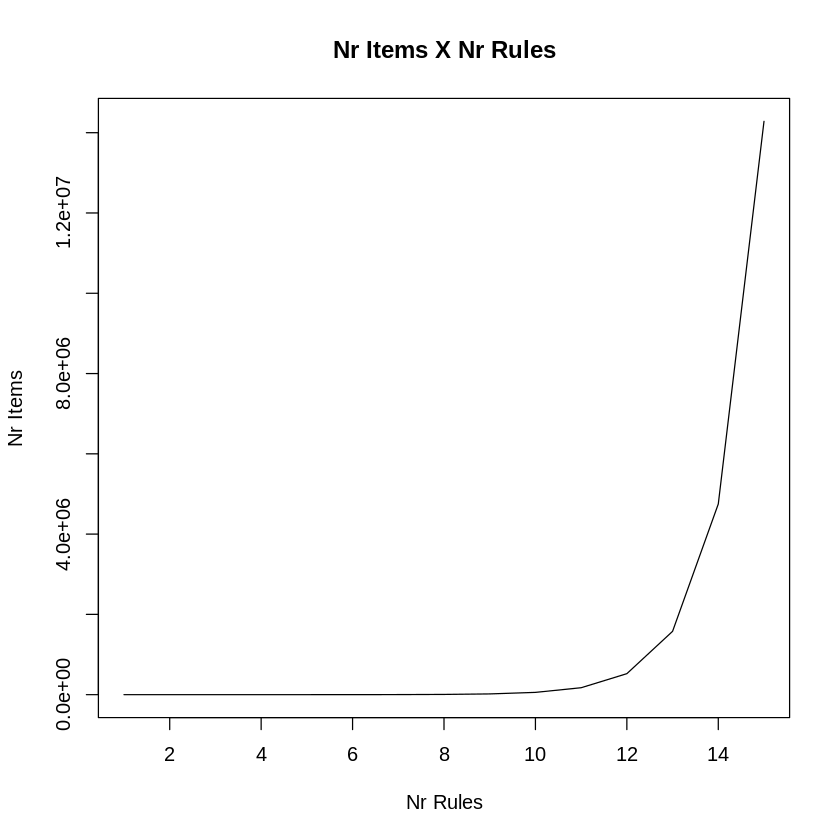

In [1]:
x = seq(1,15)

C_nk = 0
for (n in x){ 
  C_nk[n] = 3**n - 2**(n+1) + 1
}

plot(x,C_nk,type='l',xlab='Nr Rules',ylab='Nr Items',main='Nr Items X Nr Rules')

In [2]:
install.packages('gtools')
library(gtools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
k = 2
p = permutations(v=c('Tomada','Furadeira','Broca','Bateria'),n=4,r=k) 

p

Bateria,Broca
Bateria,Furadeira
Bateria,Tomada
Broca,Bateria
Broca,Furadeira
Broca,Tomada
Furadeira,Bateria
Furadeira,Broca
Furadeira,Tomada
Tomada,Bateria
Tomada,Broca


Já já você vai descobrir que são diferentes as regras:

> **Bateria → Furadeira**

> **Furadeira → Bateria**

# Métricas e poda 

As métricas são medidas de desempenho para regras e irão servir para selecionarmos as métricas mais importantes e úteis das demais.

> **{humor} → {poesia}**, métrica = 0,85

> **{ficção} → {viagem}**, métrica = 0,25

Se temos as métricas acima e definimos um *threshold*, limite mínimo, de 0.5 para essa métrica de desempenho vamos:

> Manter: **{humor} → {poesia}**

> Descartar: **{ficção} → {viagem}**


# Suporte

A métrica mais simples é o *Suporte* e o compartilhamento de transações que contêm um conjunto de itens.

$$ Support(X)= \frac{ freq(X) }{N} $$
$$ Support(X→Y)=\frac{ freq(X \cap Y) }{ N } $$

Ela é uma medida de quão frequente a regra é no domínio das transações.



# Confiança
Esta métrica mede a frequência com que os itens em Y aparecem em transações que contêm X e é dado pela fórmula.

$$ Confidence( X→ Y) = \frac{Support( X→ Y)}{Support( X)} $$



E agora já podemos entender que as regras abaixo são de fato diferentes:

> **R1** = Bateria → Furadeira

> **R2** = Furadeira → Bateria

Pois teremos 

$$S = Support(Bateria → Furadeira) = Support(Furadeira → Bateria) = \frac{ freq(Furadeira \cap Bateria) }{ N } $$

mas havendo quantidades diferentes de ocorrências de cada produto, isto é, 

$$Support(Bateria) \neq Support(Furadeira)$$ 

teremos,  

$$Confidence( Bateria → Furadeira) = \frac{S}{Support(Bateria)} $$
$$\neq$$ $$\frac{S}{Support(Furadeira)} = Confidence(Furadeira →  Bateria)$$



O significado por trás dessa métrica é a fração em que se a premissa da regra ocorre a conclusão também irá ocorrer.

# Elevação ou Lift

Esse valornos informa a probabilidade de o item Y ser comprado junto com o item X com relação ao que poderíamos supor apenas avaliando os valores de suporte individuais. 

$$ Lift( X→ Y) = \frac{ Support( X→ Y)} {Support( X) × Support( Y)}$$

$ Lift() > 1 $ diz que os dois itens ocorrem em transações conjuntas com mais frequência do que esperaríamos com base em seus valores de suporte individuais. Isso significa que é improvável que a relação seja explicada por acaso e esse limite natural é conveniente para fins de filtragem.

$ Lift() < 1 $ diz que os dois itens são emparelhados com menos frequência nas transações do que esperaríamos se os emparelhamentos ocorressem por acaso.

# Regras de Associação com `arules` package

Vamos empregar aqui o pacote `arules` para descobrir associações.

In [4]:
install.packages('arules')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(arules)



Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




# Preparação dos dados

Como em outros processos de análise de dados muitas vezes a maior parte do trabalho se concentra na *Preparação dos Dados* para empregar nos modelos. O pacote `arules` requer um conjunto de dados em um formato de `transações` e é o que você vai aprender a seguir.



# Um exemplo de Brinquedo

## Dados Originais

Eles podem diferir muito e normalmente várias transformações precisam ser empregadas para se chegar ao formato de aplicação nos modelos.

In [6]:
invoice_nr = c(101,201,201,302,302,421)
product_name = c('Tomada','Furadeira','Broca','Furadeira','Bateria','Interruptor')
product_qty = c(5,3,8,4,4,5)

invoices = data.frame(invoice_nr, product_name, product_qty)

invoices

invoice_nr,product_name,product_qty
<dbl>,<chr>,<dbl>
101,Tomada,5
201,Furadeira,3
201,Broca,8
302,Furadeira,4
302,Bateria,4
421,Interruptor,5


## Criando a Tabela de Transações

Você pode saber mais sobre como criar um arquivo de transações a partir de um dataframe [aqui](https://www.learnbymarketing.com/1043/working-with-arules-transactions-and-read-transactions/)

In [7]:
invoices$product_qty = TRUE

invoices_reshaped = reshape(data = invoices,
                            idvar = "invoice_nr",
                            timevar = "product_name",
                            direction = "wide")


invoices_reshaped

,invoice_nr,product_qty.Tomada,product_qty.Furadeira,product_qty.Broca,product_qty.Bateria,product_qty.Interruptor
,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,101,TRUE,NA,NA,NA,NA
2,201,NA,TRUE,TRUE,NA,NA
4,302,NA,TRUE,NA,TRUE,NA
6,421,NA,NA,NA,NA,TRUE


In [8]:
# Drop the transaction ID
invoice_matrix = as.matrix(invoices_reshaped[,-1])
 
# Clean up the missing values to be FALSE
invoice_matrix[is.na(invoice_matrix)] = FALSE

invoice_matrix

,product_qty.Tomada,product_qty.Furadeira,product_qty.Broca,product_qty.Bateria,product_qty.Interruptor
1,TRUE,FALSE,FALSE,FALSE,FALSE
2,FALSE,TRUE,TRUE,FALSE,FALSE
4,FALSE,TRUE,FALSE,TRUE,FALSE
6,FALSE,FALSE,FALSE,FALSE,TRUE


In [9]:
colnames(invoice_matrix) = gsub(x=colnames(invoice_matrix),
                                pattern="product_qty\\.", replacement="")

invoice_matrix

,Tomada,Furadeira,Broca,Bateria,Interruptor
1,TRUE,FALSE,FALSE,FALSE,FALSE
2,FALSE,TRUE,TRUE,FALSE,FALSE
4,FALSE,TRUE,FALSE,TRUE,FALSE
6,FALSE,FALSE,FALSE,FALSE,TRUE


In [10]:
transactions = as(invoice_matrix, "transactions")
transactions

transactions in sparse format with
 4 transactions (rows) and
 5 items (columns)

In [11]:
inspect(transactions)

    items               transactionID
[1] {Tomada}            1            
[2] {Furadeira,Broca}   2            
[3] {Furadeira,Bateria} 4            
[4] {Interruptor}       6            


## Aplicando o `arule`

O `arule` emprega um algoritmo denominado *Apriori* para descobrir as associações.


In [12]:
rules = apriori(transactions, parameter = list(minlen=2, supp=0.005, conf=0.08), control = list(verbose=F))

rules.sorted <- sort(rules, by="lift")
inspect(rules.sorted)

    lhs            rhs         support confidence coverage lift count
[1] {Broca}     => {Furadeira} 0.25    1.0        0.25     2    1    
[2] {Furadeira} => {Broca}     0.25    0.5        0.50     2    1    
[3] {Bateria}   => {Furadeira} 0.25    1.0        0.25     2    1    
[4] {Furadeira} => {Bateria}   0.25    0.5        0.50     2    1    


# **CASE**: UK Online Retail Data Set

Este é um conjunto de dados transacionais que contém cerca de 500K transações ocorridas entre 01/12/2010 e 09/12/2011 para uma rede de varejo online com sede no Reino Unido. Mais detalhes você encontra [aqui](http://archive.ics.uci.edu/ml/datasets/Online+Retail).



## Exploração Inicial dos Dados

In [13]:
df = read.csv('http://meusite.mackenzie.br/rogerio/data_load/OnlineRetail.csv')
head(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
6,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom


In [14]:
nrow(df)

[1] 541909

As operações foram realizadas em diferentes países, incluindo o Brasil.

In [15]:
table(df$Country)[1:10]


      Australia         Austria         Bahrain         Belgium          Brazil 
           1259             401              19            2069              32 
         Canada Channel Islands          Cyprus  Czech Republic         Denmark 
            151             758             622              30             389 

Mas há um único `invoice` com $32$ itens para o Brasil neste período.

In [16]:
df[ df$Country == 'Brazil' , ] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
157300,550201,22423,REGENCY CAKESTAND 3 TIER,16,2011-04-15 10:25:00,10.95,12769,Brazil
157301,550201,22699,ROSES REGENCY TEACUP AND SAUCER,24,2011-04-15 10:25:00,2.55,12769,Brazil
157302,550201,22697,GREEN REGENCY TEACUP AND SAUCER,24,2011-04-15 10:25:00,2.55,12769,Brazil
157303,550201,22698,PINK REGENCY TEACUP AND SAUCER,24,2011-04-15 10:25:00,2.55,12769,Brazil
157304,550201,22366,DOORMAT AIRMAIL,10,2011-04-15 10:25:00,6.75,12769,Brazil
157305,550201,21430,SET/3 RED GINGHAM ROSE STORAGE BOX,24,2011-04-15 10:25:00,3.39,12769,Brazil
157306,550201,22630,DOLLY GIRL LUNCH BOX,24,2011-04-15 10:25:00,1.95,12769,Brazil
157307,550201,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-15 10:25:00,1.65,12769,Brazil
157308,550201,22629,SPACEBOY LUNCH BOX,12,2011-04-15 10:25:00,1.95,12769,Brazil


## Preparação dos dados

Por hora vamos apenas eliminar valores ausentes em atributos que nos interessam.

In [17]:
sum(is.na(df))

[1] 135080

In [18]:
cbind(
   lapply(
     lapply(df, is.na)
     , sum)
   )

InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


## Criando a Tabela de Transações

Nós vamos aqui empregar o pacote `arules` e portanto precisamos construir a tabela de transações. Vamos trabalhar somente com os dados de um país apenas para reduzir a quantidade de dados neste exemplo.

In [19]:
df$Quantity = TRUE

df_reshaped = reshape(data = df[df$Country == 'Portugal', c("InvoiceNo","Description","Quantity")],
                            idvar = "InvoiceNo",
                            timevar = "Description",
                            direction = "wide")


head(df_reshaped)

Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
“multiple rows match for Description=RETROSPOT HEART HOT WATER BOTTLE: first taken”
Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
“multiple rows match for Description=RED SPOTTY BISCUIT TIN: first taken”
Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
“multiple rows match for Description=SET OF 6 SPICE TINS PANTRY DESIGN: first taken”
Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
“multiple rows match for Description=BUNDLE OF 3 ALPHABET EXERCISE BOOKS: first taken”
Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
“multiple rows match for Description=JUMBO BAG VINTAGE DOILY : first taken”
Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
“multiple rows match for Description=HEART

,InvoiceNo,Quantity.VINTAGE PAISLEY STATIONERY SET,Quantity.LUNCH BAG SUKI DESIGN,Quantity.LUNCH BAG CARS BLUE,Quantity.RED RETROSPOT LUGGAGE TAG,Quantity.RED HEART LUGGAGE TAG,Quantity.POSTAGE,Quantity.LUNCH BAG WOODLAND,Quantity.3 STRIPEY MICE FELTCRAFT,Quantity.FELTCRAFT DOLL ROSIE,⋯,Quantity.LOVE HOT WATER BOTTLE,Quantity.GOLD PHOTO FRAME,Quantity.ROSE CARAVAN DOORSTOP,Quantity.LARGE CAKE TOWEL CHOCOLATE SPOTS,Quantity.GOLD FISHING GNOME,Quantity.FRYING PAN RED RETROSPOT,Quantity.MILK PAN RED RETROSPOT,Quantity.SET OF 2 ROUND TINS DUTCH CHEESE,Quantity.KNEELING MAT HOUSEWORK DESIGN,Quantity.DOORMAT HOME SWEET HOME BLUE
,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
7135,536990,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
11474,537246,NA,NA,TRUE,NA,NA,TRUE,TRUE,TRUE,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
18282,537818,NA,NA,NA,NA,NA,TRUE,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
19900,537915,NA,NA,NA,NA,NA,TRUE,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
24037,538311,NA,TRUE,TRUE,NA,NA,TRUE,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
30973,C538882,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [20]:
# Drop the transaction ID
df_matrix = as.matrix(df_reshaped[,-1])
 
# Clean up the missing values to be FALSE
df_matrix[is.na(df_matrix)] = FALSE

head(df_matrix)

,Quantity.VINTAGE PAISLEY STATIONERY SET,Quantity.LUNCH BAG SUKI DESIGN,Quantity.LUNCH BAG CARS BLUE,Quantity.RED RETROSPOT LUGGAGE TAG,Quantity.RED HEART LUGGAGE TAG,Quantity.POSTAGE,Quantity.LUNCH BAG WOODLAND,Quantity.3 STRIPEY MICE FELTCRAFT,Quantity.FELTCRAFT DOLL ROSIE,Quantity.JUMBO STORAGE BAG SUKI,⋯,Quantity.LOVE HOT WATER BOTTLE,Quantity.GOLD PHOTO FRAME,Quantity.ROSE CARAVAN DOORSTOP,Quantity.LARGE CAKE TOWEL CHOCOLATE SPOTS,Quantity.GOLD FISHING GNOME,Quantity.FRYING PAN RED RETROSPOT,Quantity.MILK PAN RED RETROSPOT,Quantity.SET OF 2 ROUND TINS DUTCH CHEESE,Quantity.KNEELING MAT HOUSEWORK DESIGN,Quantity.DOORMAT HOME SWEET HOME BLUE
7135,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
11474,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
18282,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
19900,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
24037,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
30973,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [21]:
colnames(df_matrix) = gsub(x=colnames(df_matrix),
                                pattern="Quantity\\.", replacement="")

head(df_matrix)

,VINTAGE PAISLEY STATIONERY SET,LUNCH BAG SUKI DESIGN,LUNCH BAG CARS BLUE,RED RETROSPOT LUGGAGE TAG,RED HEART LUGGAGE TAG,POSTAGE,LUNCH BAG WOODLAND,3 STRIPEY MICE FELTCRAFT,FELTCRAFT DOLL ROSIE,JUMBO STORAGE BAG SUKI,⋯,LOVE HOT WATER BOTTLE,GOLD PHOTO FRAME,ROSE CARAVAN DOORSTOP,LARGE CAKE TOWEL CHOCOLATE SPOTS,GOLD FISHING GNOME,FRYING PAN RED RETROSPOT,MILK PAN RED RETROSPOT,SET OF 2 ROUND TINS DUTCH CHEESE,KNEELING MAT HOUSEWORK DESIGN,DOORMAT HOME SWEET HOME BLUE
7135,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
11474,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
18282,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
19900,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
24037,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
30973,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [22]:
transactions = as(df_matrix, "transactions")
transactions

transactions in sparse format with
 71 transactions (rows) and
 714 items (columns)

In [23]:
inspect(transactions)[0:10]

     items                                 transactionID
[1]  {VINTAGE PAISLEY STATIONERY SET,                   
      LUNCH BAG SUKI  DESIGN ,                          
      LUNCH BAG CARS BLUE,                              
      RED RETROSPOT LUGGAGE TAG,                        
      RED HEART LUGGAGE TAG,                            
      POSTAGE,                                          
      LUNCH BAG WOODLAND}                         7135  
[2]  {LUNCH BAG CARS BLUE,                              
      POSTAGE,                                          
      LUNCH BAG WOODLAND,                               
      3 STRIPEY MICE FELTCRAFT,                         
      FELTCRAFT DOLL ROSIE,                             
      JUMBO STORAGE BAG SUKI,                           
      JUMBO SHOPPER VINTAGE RED PAISLEY}          11474 
[3]  {POSTAGE,                                          
      HAND WARMER BIRD DESIGN,                          
      DOORMAT RED RETROSPOT,   

NULL

## Aplicando o `arule`

**Atenção**: Executando no Colab esse comando, dependendo dos parâmetros, pode consumir muita memória e cpu causando crash da sessão Colab. 


In [25]:
rules = apriori(transactions, parameter = list(minlen=2, maxlen=2, supp=0.1, conf=0.5), control = list(verbose=F))

rules.sorted <- sort(rules, by="lift")
inspect(rules.sorted)

     lhs                                      rhs                                     support confidence  coverage     lift count
[1]  {JUMBO BAG PINK VINTAGE PAISLEY}      => {JUMBO BAG SCANDINAVIAN BLUE PAISLEY} 0.1126761  0.8888889 0.1267606 7.012346     8
[2]  {JUMBO BAG SCANDINAVIAN BLUE PAISLEY} => {JUMBO BAG PINK VINTAGE PAISLEY}      0.1126761  0.8888889 0.1267606 7.012346     8
[3]  {JUMBO SHOPPER VINTAGE RED PAISLEY}   => {JUMBO BAG PINK VINTAGE PAISLEY}      0.1267606  0.8181818 0.1549296 6.454545     9
[4]  {JUMBO BAG PINK VINTAGE PAISLEY}      => {JUMBO SHOPPER VINTAGE RED PAISLEY}   0.1267606  1.0000000 0.1267606 6.454545     9
[5]  {JUMBO SHOPPER VINTAGE RED PAISLEY}   => {JUMBO BAG SCANDINAVIAN BLUE PAISLEY} 0.1126761  0.7272727 0.1549296 5.737374     8
[6]  {JUMBO BAG SCANDINAVIAN BLUE PAISLEY} => {JUMBO SHOPPER VINTAGE RED PAISLEY}   0.1126761  0.8888889 0.1267606 5.737374     8
[7]  {JUMBO BAG PINK VINTAGE PAISLEY}      => {LUNCH BAG RED RETROSPOT}             0.1126

Nossa análise, por se tratar de um exercício, não permite fazermos aqui muitos refinamentos, mas uma inspeção inicial dos dados acima permite identificar um padrão de compras em que aparentemente mochilas são compradas em conjunto com lancheiras.  

Você ainda pode tentar fazer a análise revisando os dados. Note que existem muitos itens com `POSTAGE`, um item que pode ser óbvio no caso de entregas e que podemos eliminar antes de criarmos o conjunto de transações. 

Muitas outras operações como essas podem ser feitas selecionando e agrupando itens de produtos trantando as *strings* de nomes dos produtos, o que realmente é muitas vezes feito e necessário, mas não nos aprofundaremos nisso aqui.


# Outras métricas Leverage e Conviction

Existem outras métricas para avaliar o desempenho de regras de associação. A métrica de alavancagem ou *leverage* também se baseia no suporte. Ela é semelhante à elevação, mas normalmente é mais fácil de interpretar.

$$ Leverage(X→Y)=Support(X \cap Y)−Support(X)Support(Y)$$
 
A alavancatem é um valor entre $- 1$  e  $+ 1$ enquanto a elevação (lift) varia de  $0$  ao infinito sendo o ponto de corte $1$.

A convicção ou *conviction* traz a mesma ideia da elevação e da alavancagem, mas é mais complicada e bastante menos intuitiva. 

$$Conviction(X→Y)=Support(X)Support(\bar{Y})Support(X \cap \bar{Y})$$

onde $\bar{Y}$ indica o complemento de $Y$.

# Como Funciona? O Princípio Apriori

A descoberta de regras de associação é um problema que pode ser definido como: Dado um conjunto de transações T, encontre todas as regras com suporte ≥ minsup e confiança ≥ minconf (onde minsup e minconf são os correspondentes limiares de suporte de confiança). Você ainda pode ordenar esses valores em ordem descrescente de elevação, alavancagem ou convicção. 

Existem algumas técnicas para fazermos esses filtros de regras, mas a técnica mais comum é conhecida como **Apriori** que emprega a medida de suporte para reduzir o número de conjuntos de itens candidatos explorados durante a geração dos conjuntos frequentes de itens. Essa técnica é orientada pelo seguinte princípio:

> Teorema (**Princípio Apriori**). Se um conjunto de itens é frequente, então todos os seus
os subconjuntos também devem ser frequentes.


![imagem](https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/figuras/associationrules1.png?raw=true)

![imagem](https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/figuras/associationrules2.png?raw=true)

O algoritmo abaixo é um pseudo código de implementação do algoritmo **Apriori** e o esquema a seguir ilustra como refinamos as regras possíveis a partir do suporte das regras com o algoritmo.

![imagem](https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/figuras/associationrules4.png?raw=true)

![imagem](https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/figuras/associationrules3.png?raw=true)

Existem muitos outros algoritmos de busca de regras de associação que buscam otimizar e tornar mais eficiente a busca de regras de interesse. Mas o conceito é o mesmo, o de filtrar empregando critérios de desempenho das regras, e para os nossos propósitos o entendimento dos conceitos do **Apriori** são bastante suficientes.